# Abstract:
Heart disease is the major cause of morbidity and mortality globally: it accounts for more deaths annually than any other cause.The silver lining is that heart attacks are highly preventable and simple lifestyle modifications(such as reducing alcohol and tobacco use; eating healthily and exercising) coupled with early treatment greatly improves its prognosis. It is, however, difficult to identify high risk patients because of the multi-factorial nature of several contributory risk factors such as diabetes, high blood pressure, high cholesterol, et cetera. This is where machine learning and data mining come to the rescue.
Doctors and scientists alike have turned to machine learning (ML) techniques to develop screening tools and this is because of their superiority in pattern recognition and classification as compared to other traditional statistical approaches.

# About
  The dataset has been collected from kaggle(https://www.kaggle.com/imnikhilanand/heart-attack-prediction). I have trained the model using SVM(Support Vector Machine) Algorithm to detectt the Heart attack.

In [60]:
#importing required libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import classification_report

In [61]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [62]:
#reading the dataset
df=pd.read_csv("data.csv")

In [63]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130,132,0,2,185,0,0.0,?,?,?,0
1,29,1,2,120,243,0,0,160,0,0.0,?,?,?,0
2,29,1,2,140,?,0,0,170,0,0.0,?,?,?,0
3,30,0,1,170,237,0,1,170,0,0.0,?,?,6,0
4,31,0,2,100,219,0,1,150,0,0.0,?,?,?,0


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         294 non-null    int64  
 1   sex         294 non-null    int64  
 2   cp          294 non-null    int64  
 3   trestbps    294 non-null    object 
 4   chol        294 non-null    object 
 5   fbs         294 non-null    object 
 6   restecg     294 non-null    object 
 7   thalach     294 non-null    object 
 8   exang       294 non-null    object 
 9   oldpeak     294 non-null    float64
 10  slope       294 non-null    object 
 11  ca          294 non-null    object 
 12  thal        294 non-null    object 
 13  num         294 non-null    int64  
dtypes: float64(1), int64(4), object(9)
memory usage: 32.3+ KB


In [65]:
df.describe()

,age,sex,cp,oldpeak,num
count,294.000000,294.000000,294.000000,294.000000,294.000000
mean,47.826531,0.724490,2.982993,0.586054,0.360544
std,7.811812,0.447533,0.965117,0.908648,0.480977
min,28.000000,0.000000,1.000000,0.000000,0.000000
25%,42.000000,0.000000,2.000000,0.000000,0.000000
50%,49.000000,1.000000,3.000000,0.000000,0.000000
75%,54.000000,1.000000,4.000000,1.000000,1.000000
max,66.000000,1.000000,4.000000,5.000000,1.000000


In [66]:
# checking if there are any null values
df.isnull()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,False,False,False,False,False,False,False,False,False,False,False,False,False,False
290,False,False,False,False,False,False,False,False,False,False,False,False,False,False
291,False,False,False,False,False,False,False,False,False,False,False,False,False,False
292,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [67]:
df.shape

(294, 14)

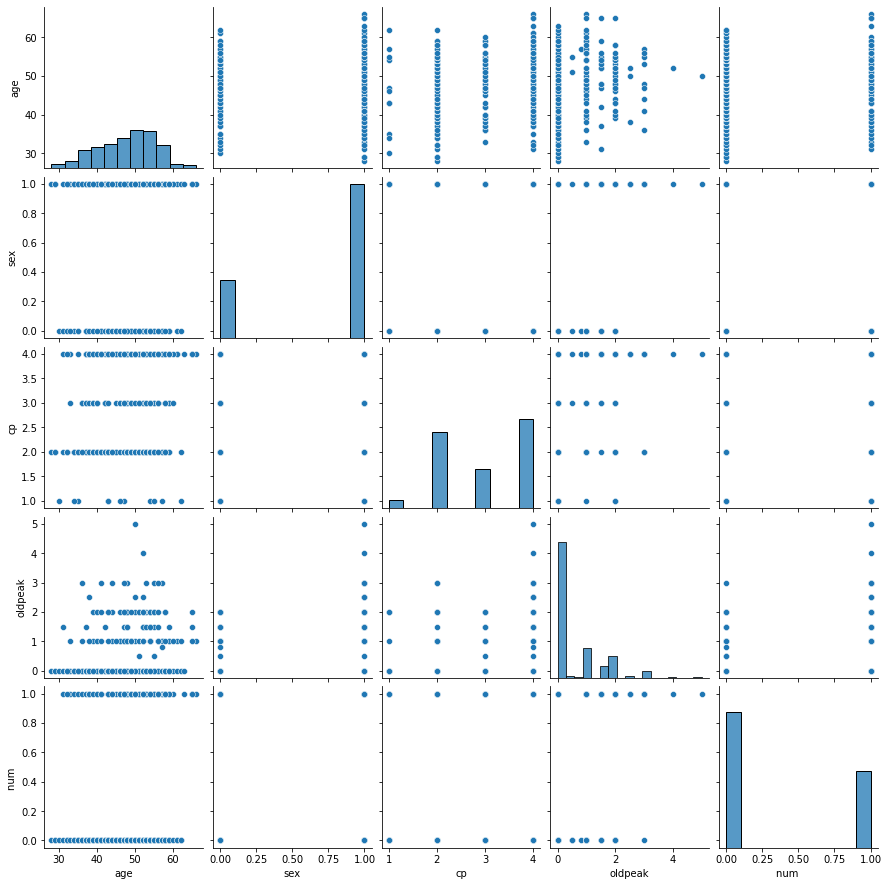

In [68]:
# comparing between features
sns.pairplot(df)

In [69]:
#Renaming the target column to target
df.rename(columns={'num       ': 'target'}, inplace=True) 

In [70]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,28,1,2,130,132,0,2,185,0,0.0,?,?,?,0
1,29,1,2,120,243,0,0,160,0,0.0,?,?,?,0
2,29,1,2,140,?,0,0,170,0,0.0,?,?,?,0
3,30,0,1,170,237,0,1,170,0,0.0,?,?,6,0
4,31,0,2,100,219,0,1,150,0,0.0,?,?,?,0


In [71]:
#Dropping columns which has ?
df.drop(['slope','ca','thal'], axis = 'columns',inplace=True)

In [72]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
0,28,1,2,130,132,0,2,185,0,0.0,0
1,29,1,2,120,243,0,0,160,0,0.0,0
2,29,1,2,140,?,0,0,170,0,0.0,0
3,30,0,1,170,237,0,1,170,0,0.0,0
4,31,0,2,100,219,0,1,150,0,0.0,0


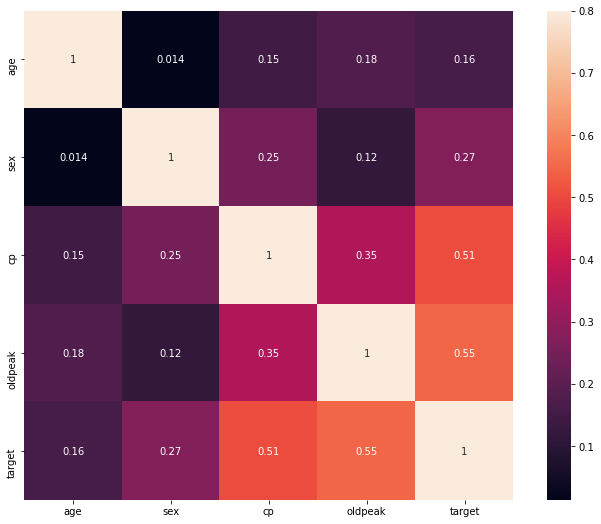

In [73]:
#Plotting correlation matrix for the data
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True, annot=True);

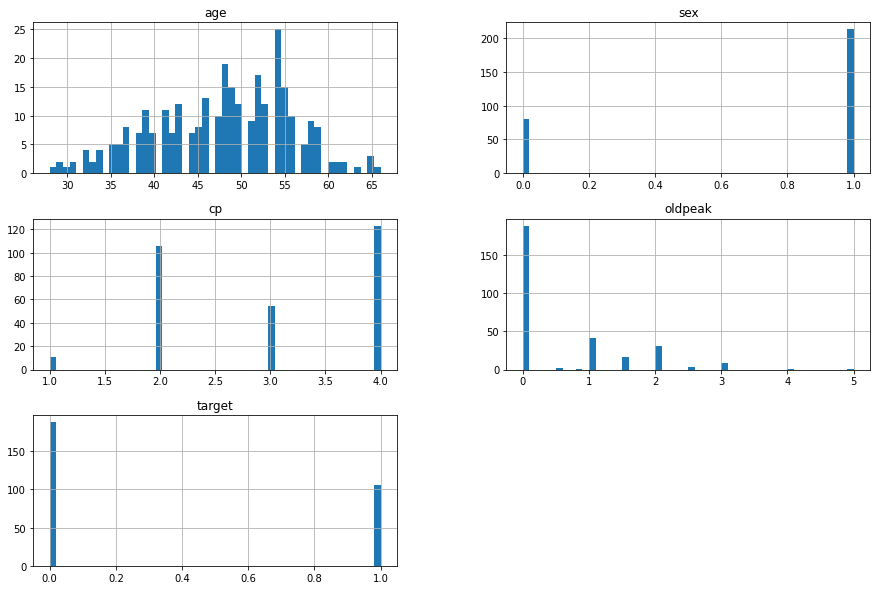

In [74]:
df.hist(bins=50,figsize=(15,10))
plt.show()

In [75]:
X = df.drop('target',axis = 1) 
y = df.target

C:\ProgramData\Anaconda3\envs\new_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


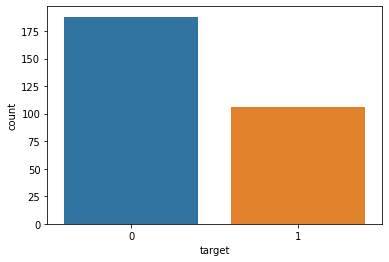

In [76]:
plt.figure(figsize=(6,4))
sns.countplot(y)
plt.show()

In [77]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak
0,28,1,2,130,132,0,2,185,0,0.0
1,29,1,2,120,243,0,0,160,0,0.0
2,29,1,2,140,?,0,0,170,0,0.0
3,30,0,1,170,237,0,1,170,0,0.0
4,31,0,2,100,219,0,1,150,0,0.0


In [78]:
X.drop(['fbs','chol','restecg'], axis = 'columns',inplace=True)

In [79]:
X=X.replace('?',None)
X=X.replace('?',0)

In [80]:
X.head()

,age,sex,cp,trestbps,thalach,exang,oldpeak
0,28,1,2,130,185,0,0.0
1,29,1,2,120,160,0,0.0
2,29,1,2,140,170,0,0.0
3,30,0,1,170,170,0,0.0
4,31,0,2,100,150,0,0.0


In [81]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       294 non-null    int64  
 1   sex       294 non-null    int64  
 2   cp        294 non-null    int64  
 3   trestbps  294 non-null    object 
 4   thalach   294 non-null    object 
 5   exang     294 non-null    object 
 6   oldpeak   294 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 16.2+ KB


In [82]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [83]:
# Splitting into train and test data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=109)

In [84]:
x_train.shape

(235, 7)

In [85]:
x_test.shape

(59, 7)

In [86]:
y_train.shape

(235,)

In [87]:
y_test.shape

(59,)

In [88]:
#creating the classfier
clf=svm.SVC(kernel='linear')

In [89]:
#fitting the train data
clf.fit(x_train,y_train)

SVC(kernel='linear')

In [90]:
pred=clf.predict(x_train)
print(pred)


[0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1
 0 1 0 1 0 1 1 0 0 0 1 0 0 1 0 1 0 0 1 0 1 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 1
 1 0 0 1 1 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 1 0 1 1 1 0 0 0 1 1 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 1 0 0 1
 0 0 1 0 1 1 0 1 0 0 0 1 1]


In [91]:
# Importing the classification report and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_train,pred))

[[139  14]
 [ 26  56]]


In [92]:
print(classification_report(y_train, pred))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87       153
           1       0.80      0.68      0.74        82

    accuracy                           0.83       235
   macro avg       0.82      0.80      0.81       235
weighted avg       0.83      0.83      0.83       235



In [93]:
y_pred=clf.predict(x_test)

In [94]:
metrics.accuracy_score(y_test, y_pred)

0.8813559322033898

In [95]:
 metrics.precision_score(y_test,y_pred)

0.9473684210526315

In [96]:
metrics.recall_score(y_test,y_pred)

0.75

In [97]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.97      0.91        35
           1       0.95      0.75      0.84        24

    accuracy                           0.88        59
   macro avg       0.90      0.86      0.87        59
weighted avg       0.89      0.88      0.88        59



# Conclusion
  SVM model is able to detect heart attack with 83% accuracy in training dataset and 88% accuracy in test dataset.